<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-1/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 4

Work on the digits dataset to classify handwritten digits using the provided Digits.zip on Canvas. ZipDigits.train is the training dataset and ZipDigits.test is the test dataset. The first column in the dataset is the digit label, and the next 256 columns are values between -1 and 1 representing a grayscale image.


You will need to preprocess the data to get these labels. Take some time to familiarize yourself with the dataset. We will work on this dataset throughout the course. Do the following preprocessing steps for both training and testing datasets:


Filter the dataset to include only digits labeled as ‘1’ and ‘5’. Convert the labels into labels for binary classification, i.e., ‘1’ and ‘-1’.


Extract intensity and symmetry features on the dataset as discussed in the class. You may use your own mathematical definition of the two features. In the written part of the submission, include the definition you used.


For the training dataset, plot a 2D scatter plot with the two features you extracted. Use different colors and/or markers for the different classes. Submit the plot on the written part of your submission.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def load_data(name):
    labels = []
    images = []
    with open(name, 'r') as f:
        for row in f:
            row = row.strip().split(' ')
            row=np.array(row).astype(float)
            #print(row.shape)

            label=row[0]
            image = row[1:]
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

def featExtrct(name):

    images, labels = load_data(name)
    images = images.reshape(-1, 16, 16)
    #images = (images+1)/2 #mapping from 0 to 255

    indselect = (labels == 1) | (labels == 5)
    images = images[indselect]
    labels = labels[indselect]
    # Extract feature

    #intensity
    inten = images.reshape(-1, 16*16).mean(axis=-1)

    #symmetry

    symall=[]
    for i in range(len(images)):
        sym1 = np.abs(np.fliplr(images[i]) - images[i]) +np.abs(np.flipud(images[i]) - images[i])

        symall.append(sym1)
    symall=np.array(symall)
    print(symall.shape)
    sym=np.array(symall.reshape(len(images),-1).mean(axis=-1))
    print('sym shape')

    #plotting features
    i1 = (labels == 1)
    i5 = (labels == 5)
    labels = np.zeros(len(labels))
    labels[i1] = 1
    labels[i5] = -1

    featvector = np.concatenate((inten[:, None], sym[:, None]), axis=1)

    plt.figure()
    plt.scatter(inten[i1], sym[i1], c='b', marker='o', label='digit 1 feature')
    plt.scatter(inten[i5], sym[i5], c='r', marker='x', label='digit 5 feature')
    plt.legend()
    plt.xlabel('Intensity')
    plt.ylabel('Vertical Symmetry')
    plt.title('For the file named:'+name)
    plt.show()



    return featvector, labels


(1561, 16, 16)
sym shape


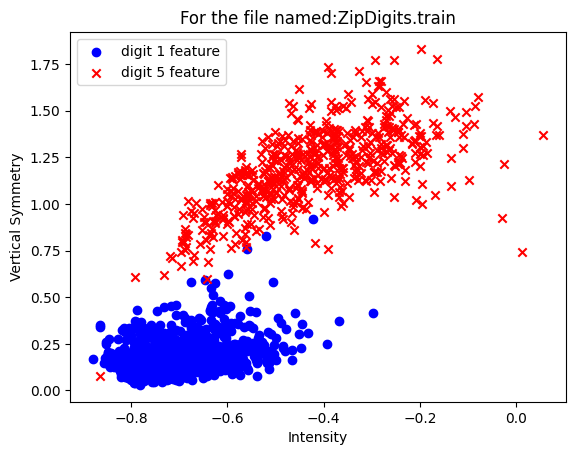

(424, 16, 16)
sym shape


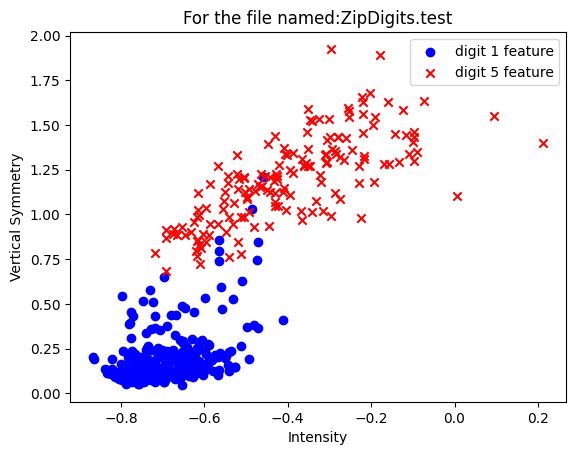

In [6]:
trainfile = 'ZipDigits.train'
testfile = 'ZipDigits.test'
#Data collect
traindata, trainlabel= featExtrct(trainfile)
testdata, testlabel=featExtrct(testfile)

#Padded with 1
trDataPadded = np.concatenate((np.ones((len(traindata), 1)), traindata), axis=1)
tsDataPadded= np.concatenate((np.ones((len(testdata), 1)), testdata), axis=1)

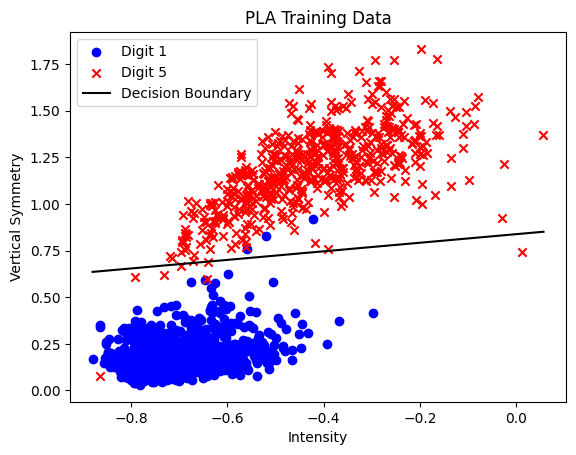

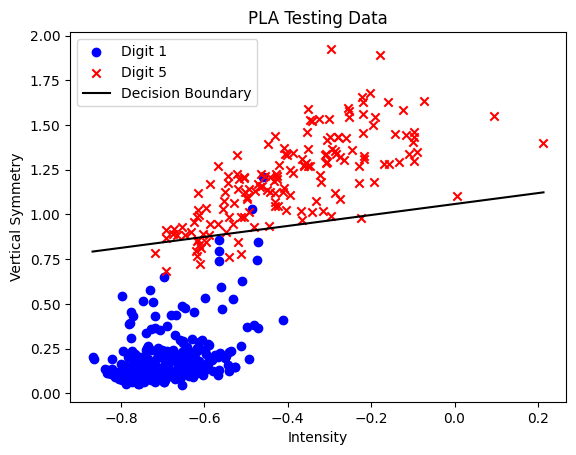

In [7]:
def pla(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])  # Initialize the weight vector to zeros
    for _ in range(max_iter):
        misclassified = np.where(y * np.dot(X, w) <= 0)[0]
        if len(misclassified) == 0:
            break
        random_misclassified = np.random.choice(misclassified)
        w += y[random_misclassified] * X[random_misclassified]
    return w


# Assuming you have trDataPadded as the training data with a bias term
# and trainlabel as the corresponding labels (-1 or 1)
w = pla(trDataPadded, trainlabel, max_iter=1000)

# Plot the data points
plt.figure()
plt.scatter(trDataPadded[trainlabel == 1, 1], trDataPadded[trainlabel == 1, 2], c='b', marker='o', label='Digit 1')
plt.scatter(trDataPadded[trainlabel == -1, 1], trDataPadded[trainlabel == -1, 2], c='r', marker='x', label='Digit 5')

# Plot the decision boundary
x_decision = np.linspace(min(trDataPadded[:, 1]), max(trDataPadded[:, 1]), 100)
y_decision = (-w[0] - w[1] * x_decision) / w[2]
plt.plot(x_decision, y_decision, 'k-', label='Decision Boundary')

plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Vertical Symmetry')
plt.title('PLA Training Data')
plt.show()

#Testing Data
w = pla(tsDataPadded, testlabel, max_iter=1000)

# Plot the data points
plt.figure()
plt.scatter(tsDataPadded[testlabel == 1, 1], tsDataPadded[testlabel == 1, 2], c='b', marker='o', label='Digit 1')
plt.scatter(tsDataPadded[testlabel == -1, 1], tsDataPadded[testlabel == -1, 2], c='r', marker='x', label='Digit 5')

# Plot the decision boundary
x_decision = np.linspace(min(tsDataPadded[:, 1]), max(tsDataPadded[:, 1]), 100)
y_decision = (-w[0] - w[1] * x_decision) / w[2]
plt.plot(x_decision, y_decision, 'k-', label='Decision Boundary')

plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Vertical Symmetry')
plt.title('PLA Testing Data')
plt.show()

References

- ChatGPT and Bard
-https://courses.cs.washington.edu/courses/cse446/18wi/slides/perceptron2.pdf
-https://www.youtube.com/watch?v=4Gac5I64LM4


Discussed With Shashank